In [1]:
## Imports for all Librarys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Imports Data Visualisatio
from matplotlib import pyplot as plt
import seaborn as sns
# Imports for Machine Learning
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("CropRecommendation.csv")
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
print(df.label.unique())
print("Total unique vlaues in Label columns are: ",len(df.label.unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total unique vlaues in Label columns are:  22


In [4]:
labelList = df.label.unique()
vec = np.zeros_like(df.N)
for i in range(len(df.label)):
    for n in range(len(labelList)):
        if df.label[i] == labelList[n]:
            #df.label[i] = n
            vec[i] = n
            break
df["classNumber"] = vec
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
classNumber      int64
dtype: object

<AxesSubplot:xlabel='ratio of Nitrogen content in soil', ylabel='ratio of Phosphorous content in soi'>

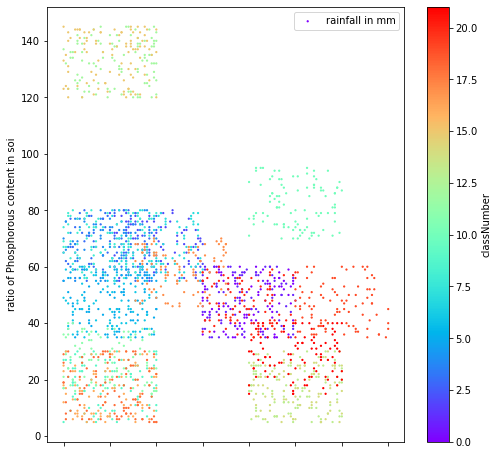

In [5]:
df.plot(kind="scatter", x="N", y="P", c="classNumber", cmap="rainbow", s=1.5, figsize=(8,8),
        xlabel="ratio of Nitrogen content in soil", ylabel="ratio of Phosphorous content in soi", label="rainfall in mm")

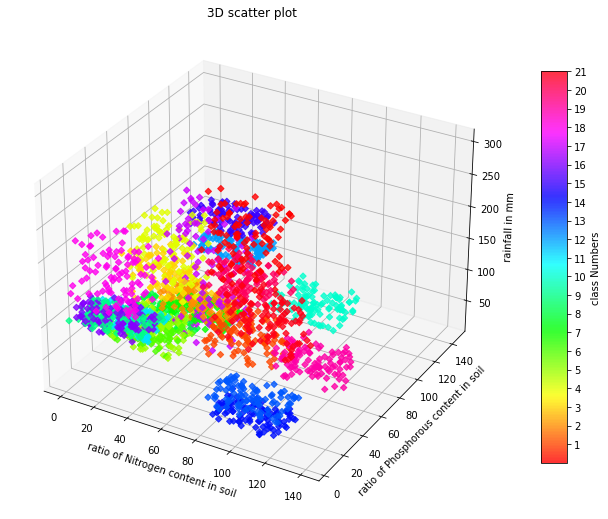

In [6]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt3D = ax.scatter3D(df.N, df.P, df.rainfall,
                    alpha = 0.8,
                    c = df.classNumber,
                    cmap = my_cmap,
                    marker ='D')

plt.title("3D scatter plot")
ax.set_xlabel("ratio of Nitrogen content in soil")
ax.set_ylabel("ratio of Phosphorous content in soil")
ax.set_zlabel("rainfall in mm")

tck = np.arange(1,22,1)
fig.colorbar(sctt3D, ax = ax, shrink = 0.8, aspect = 15, ticks = tck, label="class Numbers")

# show plot
plt.show()

<AxesSubplot:>

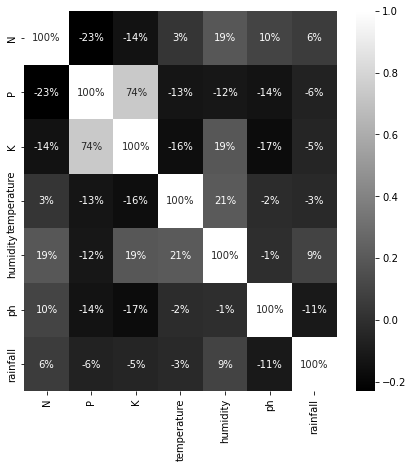

In [7]:
#Corelation
df_cor = df.drop(['label', 'classNumber'], axis = 1)
correlation = df_cor.corr()
#Visualize Correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation, annot =True, fmt= '.0%', cmap="gray")

In [8]:
# Remove crops (label) from data for splitting
y = df['label']
x = df.drop(['label', 'classNumber'], axis = 1)

# Split data 70/30 for ML
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

print("Dataset Count for Training: ", len(X_train))
print("Dataset Count for Testing: ", len(X_test))


Dataset Count for Training:  1540
Dataset Count for Testing:  660


In [9]:
# Load scikit-learn models
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
# List of scikit-learn models for evaluation
models = []
models.append(('Ridge', RidgeClassifier()))
models.append(('RBF SVM', SVC()))
models.append(('Nearest Neighbors', KNeighborsClassifier()))
models.append(('Naive Bays', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()))


In [11]:
# Loop through the list and get score for each model
results = []
scoring = 'accuracy'
for name, model in models:
    Y_prediction = model.fit(X_train, Y_train).predict(X_test)
    score = accuracy_score(Y_test, Y_prediction)
    results.append([name, score])
    score_percent = score * 100
    print(name, "->", 'Accuracy score: %.2f' % score_percent, "%")

Ridge -> Accuracy score: 75.00 %
RBF SVM -> Accuracy score: 98.03 %
Nearest Neighbors -> Accuracy score: 98.33 %
Naive Bays -> Accuracy score: 99.55 %
Decision Tree -> Accuracy score: 98.48 %
Random Forest -> Accuracy score: 99.85 %
Ada Boost -> Accuracy score: 15.61 %
QuadraticDiscriminantAnalysis -> Accuracy score: 99.09 %
